In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [5]:
def min_max_scaler(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

def standard_scaler(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

In [23]:
path = "preproc1.csv"
df = pd.read_csv(path, index_col=0)
yindex = df.columns.values.tolist().index('rain_sum (mm)')
ytrainmax = df.iloc[:,yindex].max()
y = df.iloc[:,yindex]
Xtrain = df.drop(columns='rain_sum (mm)')

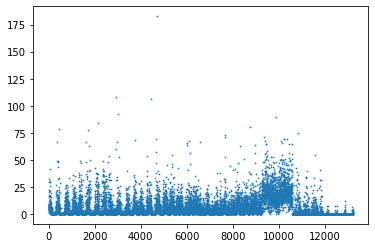

In [24]:
columnnew = {}
for i,column in enumerate(Xtrain.columns):
    columnnew[column] = min_max_scaler(Xtrain[column])

X = pd.DataFrame(columnnew)
X.head()
plt.scatter(X.index,y,s=0.5)

In [39]:
#test pred
test = "proctest2.csv"
df = pd.read_csv(test, index_col=0)
columnnew = {}
for i,column in enumerate(df.columns):
    columnnew[column] = (df[column] - Xtrain[column].min()) / (Xtrain[column].max() - Xtrain[column].min())

xpred = pd.DataFrame(columnnew)
xpred.head()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,0.904209,0.948304,0.901235,0.932600,0.641271,0.0,0.083752,0.082516,0.372222,0.583990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.895501,0.951535,0.891358,0.942228,0.617212,0.0,0.127303,0.120915,0.363889,0.566929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.908563,0.954766,0.887654,0.949106,0.644355,0.0,0.246231,0.209150,0.322222,0.620735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899855,0.954766,0.883951,0.953232,0.684454,0.0,0.221106,0.183007,0.319444,0.650919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.898403,0.964459,0.874074,0.960110,0.673658,0.0,0.294807,0.244281,0.294444,0.654856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


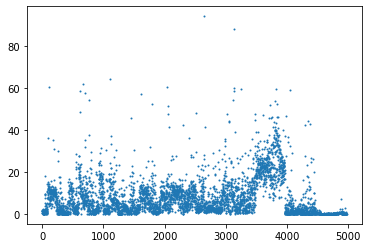

In [42]:

testpred = mlp.predict(xpred)
predictions = pd.DataFrame(list(map(lambda x: x if x > 0 else 0, testpred)))
plt.scatter(range(len(predictions)),predictions,s = 1)
# predictions.to_csv('pred2.csv')

In [25]:
def nn(X,y,hidden,iter,solv='adam',act='logistic'):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create an instance of the MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(hidden), max_iter=iter, random_state=0,solver=solv,activation=act,
    learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001)
    # mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    y_predtrain = mlp.predict(X_train)

    # Calculate the MSE on the test set
    msetrain = mean_squared_error(y_train, y_predtrain)
    # print('mse train: ',msetrain)

    mse = mean_squared_error(y_test, y_pred)
    # print('mse test: ',mse)

    epoch = range(mlp.n_iter_)
    # plt.plot(epoch, mlp.loss_curve_)

    loss = mlp.loss_
    # print('loss = ',loss)

    r_squared = mlp.score(X_test, y_test)
    # print ('R2 = ', r_squared)

    return mse

mse train:  24.571096957281142
mse test:  35.23553693794296
loss =  12.460939033654876
R2 =  0.6413054718738449


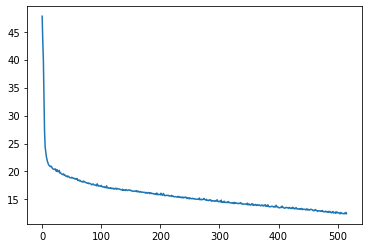

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,35), max_iter=10000, random_state=0,solver='adam',activation='logistic',
learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001)
# mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_predtrain = mlp.predict(X_train)

# Calculate the MSE on the test set
msetrain = mean_squared_error(y_train, y_predtrain)
print('mse train: ',msetrain)

mse = mean_squared_error(y_test, y_pred)
print('mse test: ',mse)

epoch = range(mlp.n_iter_)
plt.plot(epoch, mlp.loss_curve_)

loss = mlp.loss_
print('loss = ',loss)

r_squared = mlp.score(X_test, y_test)
print ('R2 = ', r_squared)


In [ ]:

# mlp = MLPRegressor(hidden_layer_sizes=(20), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.99, alpha=0.005), R2 =  0.5806964713151754
# mlp = MLPRegressor(hidden_layer_sizes=(100), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.99, alpha=0.005) , R2 =  0.5812683441828551
# mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.99, alpha=0.005) , R2 =  0.5900805335559639
# mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.005) , R2 =  0.6008927420367851
# mlp = MLPRegressor(hidden_layer_sizes=(70,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.005) , R2 =  0.6134754256308285
# mlp = MLPRegressor(hidden_layer_sizes=(50,30), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001), R2 =  0.6196457428587787
# mlp = MLPRegressor(hidden_layer_sizes=(50,35), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.6413054718738449 , y=1/10


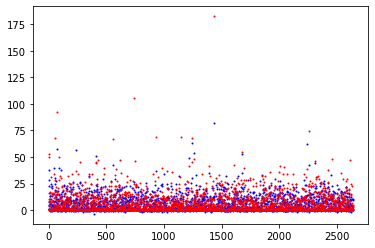

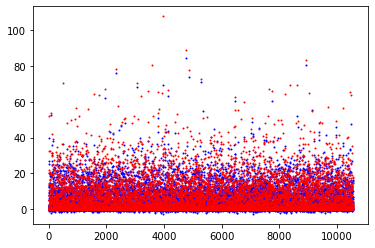

In [27]:
plt.scatter(range(len(y_pred)),y_pred,s=1,c='blue')
plt.scatter(range(len(y_test)),y_test,s=1,c='red')
plt.show()
plt.scatter(range(len(y_predtrain)),y_predtrain,s=1,c='blue')
plt.scatter(range(len(y_train)),y_train,s=1,c='red')
plt.show()

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


35.23553693794296

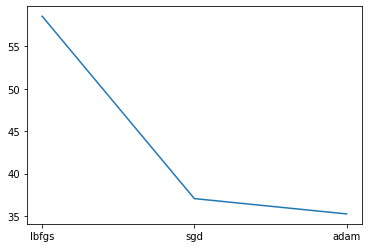

In [36]:
num_neuron = ['lbfgs', 'sgd', 'adam']
mselist = []
for n in num_neuron :
    mselist.append(nn(X,y,(50,35),5000,n))

plt.plot(num_neuron,mselist)
min(mselist)